In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
fire_df = pd.read_csv('Resources/wildfire_data2.csv')
fire_df.head()

,fire_size,fire_size_class,fire_cause,latitude,longitude,state,discovery_month,discovery_date,discovery_year,Vegetation,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,Feb,1/12/2007,2007,12,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,Dec,11/11/2006,2006,15,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,Feb,1/30/2004,2004,16,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,Jun,5/7/2005,2005,0,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,Miscellaneous,30.700600,-90.591400,LA,Sep,8/23/1999,1999,12,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [2]:
# Generate our categorical variable list
fire_cat = fire_df.dtypes[fire_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
fire_df[fire_cat].nunique()

fire_size_class       6
fire_cause           13
state                51
discovery_month      12
discovery_date     8114
dtype: int64

In [3]:
fire_df.drop(['discovery_date'], axis=1, inplace=True)
fire_df.head()

,fire_size,fire_size_class,fire_cause,latitude,longitude,state,discovery_month,discovery_year,Vegetation,fire_mag,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,Feb,2007,12,1.0,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,Dec,2006,15,0.1,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,Feb,2004,16,1.0,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,Jun,2005,0,0.1,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,Miscellaneous,30.700600,-90.591400,LA,Sep,1999,12,0.1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [4]:
# Check the unique value counts to see if binning is required
state_count = fire_df.state.value_counts()
state_count

TX    6080
GA    4811
CA    3847
MS    3493
FL    3115
SC    2780
NC    2591
AL    2528
OK    1963
AR    1537
NY    1418
LA    1294
AZ    1282
KY    1249
TN    1190
ID    1159
NM    1132
MN    1128
AK    1006
MT     997
OR     901
MO     828
SD     789
PR     766
WA     658
NV     658
UT     653
VA     641
WV     638
ND     544
WI     499
WY     486
CO     432
NE     313
MI     285
KS     263
NJ     244
PA     207
ME     179
IA     165
OH     128
HI     108
IL      88
MD      68
CT      66
NH      59
IN      44
MA      33
VT      11
RI      10
DE       3
Name: state, dtype: int64

<AxesSubplot:ylabel='Density'>

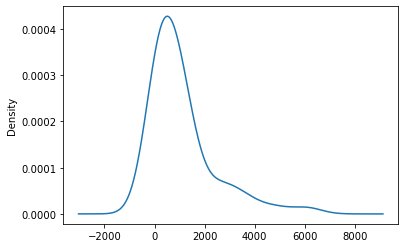

In [5]:
# Visualize the value counts of state
state_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_state = list(state_count[state_count<500].index)

# Replace in dataframe
for state in replace_state:
    fire_df.state = fire_df.state.replace(state,"Other")
    
# Check to make sure binning was successful
fire_df.state.value_counts()

TX       6080
GA       4811
CA       3847
Other    3691
MS       3493
FL       3115
SC       2780
NC       2591
AL       2528
OK       1963
AR       1537
NY       1418
LA       1294
AZ       1282
KY       1249
TN       1190
ID       1159
NM       1132
MN       1128
AK       1006
MT        997
OR        901
MO        828
SD        789
PR        766
NV        658
WA        658
UT        653
VA        641
WV        638
ND        544
Name: state, dtype: int64

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(fire_df[fire_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(fire_cat)
encode_df.head()

KeyError: "['discovery_date'] not in index"

In [ ]:
# Merge one-hot encoded features and drop the originals
fire_df = fire_df.merge(encode_df,left_index=True, right_index=True)
fire_df = fire_df.drop(fire_cat,1)
fire_df.head()

In [ ]:
# Remove loan status target from features data
y = fire_df.fire_size_class_G
X = fire_df.drop(columns=["fire_size_class_B","fire_size_class_C","fire_size_class_D","fire_size_class_E","fire_size_class_F","fire_size_class_G"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")